In this file, we try to visualise the result data from a 0D H2-air combustion test case implemented using Openfoam chemfoam solver.

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# import data
file_path = r"C:\Users\ADITI\Downloads\Aditya CFD\h2_combustion_dataset\T1000_P202650.out"

data = pd.read_csv(file_path, sep='\t', skiprows=1)
data.head()

,t,T,Qdot,P,H2,H,O2,O,OH,HO2,H2O2,H2O,AR,N2
0,1.000000e-07,1000.0,-824.946,202650,0.004231,2.100800e-13,0.004231,2.290120e-15,2.021970e-15,2.198430e-13,1.401150e-18,4.112770e-16,0,0.01591
1,3.000000e-07,1000.0,-789.345,202650,0.004231,6.033260e-13,0.004231,1.880080e-14,1.359050e-14,6.820920e-13,1.290390e-17,8.812880e-15,0,0.01591
2,7.000000e-07,1000.0,-717.125,202650,0.004231,1.324740e-12,0.004231,8.685340e-14,4.826390e-14,1.689940e-12,7.327670e-17,7.892900e-14,0,0.01591
3,1.500000e-06,1000.0,-575.328,202650,0.004231,2.654300e-12,0.004231,3.030020e-13,1.314200e-13,4.011170e-12,3.623060e-16,4.914500e-13,0,0.01591
4,3.100000e-06,1000.0,-292.445,202650,0.004231,5.269190e-12,0.004231,8.624610e-13,3.189510e-13,9.818610e-12,1.754250e-15,2.564460e-12,0,0.01591


In [3]:
data.__len__()

88721

Make plots of species data before and after normalization

In [8]:
data['t']

0         1.000000e-07
1         3.000000e-07
2         7.000000e-07
3         1.500000e-06
4         3.100000e-06
              ...     
177214    9.999730e+01
177215    9.999820e+01
177216    9.999910e+01
177217    9.999950e+01
177218    1.000000e+02
Name: t, Length: 177219, dtype: float64

Temperature and Pressure

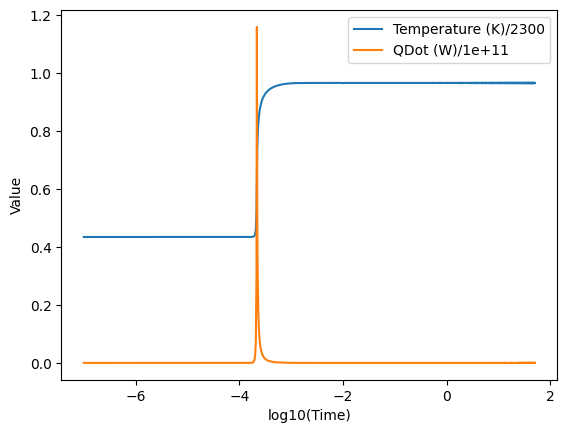

In [17]:
plt.plot(np.log10(data['t']), data['T']/2300, label='Temperature (K)/2300')
plt.plot(np.log10(data['t']), data['Qdot']/1e+11, label='QDot (W)/1e+11')
# plt.plot(np.log10(data['t']), data['P']/200000, label='Pressure (Pa)/200000')

plt.xlabel('log10(Time)')
plt.ylabel('Value')
plt.legend()
plt.show()

Major Species

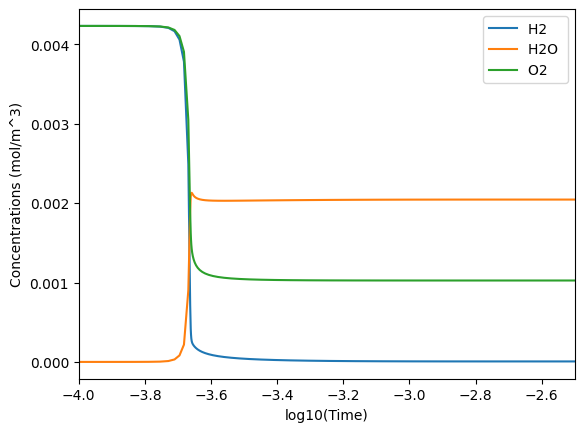

In [29]:
# plt.plot(np.log10(data['t']), data['T']/5e+5, label='Temperature (K)/2300')
plt.plot(np.log10(data['t']), data['H2'], label='H2 ')
plt.plot(np.log10(data['t']), data['H2O'], label='H2O ')
plt.plot(np.log10(data['t']), data['O2'], label='O2 ')

plt.xlabel('log10(Time)')
plt.ylabel('Concentrations (mol/m^3)')
plt.xlim(-4, -2.5) 
plt.legend()
plt.show()

Minor Species

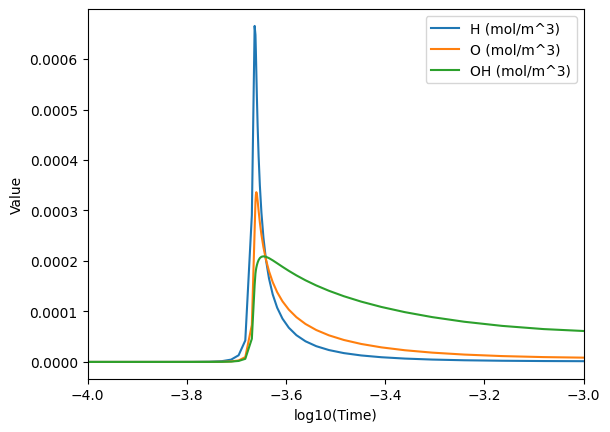

In [6]:
# plt.plot(np.log10(data['t']), data['T']/5e+5, label='Temperature (K)/2300')
plt.plot(np.log10(data['t']), data['H'], label='H (mol/m^3)')
plt.plot(np.log10(data['t']), data['O'], label='O (mol/m^3)')
plt.plot(np.log10(data['t']), data['OH'], label='OH (mol/m^3)')

plt.xlabel('log10(Time)')
plt.ylabel('Value')
plt.xlim(-4, -3) 
plt.legend()
plt.show()

Minor Species 

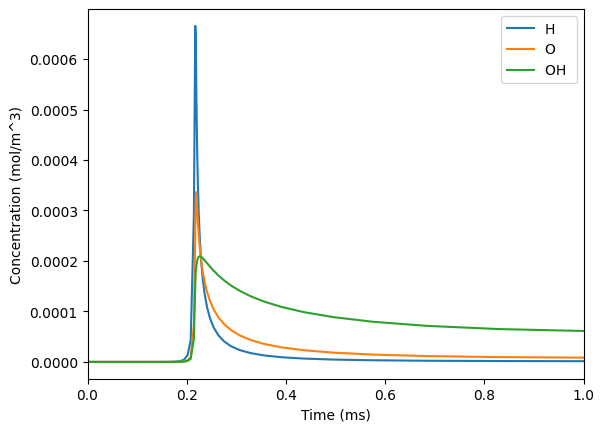

In [30]:
# plt.plot(np.log10(data['t']), data['T']/5e+5, label='Temperature (K)/2300')
# plt.plot(data['t'], data['H2'], label='H2 (mol/m^3)')
# plt.plot(data['t'], data['H2O'], label='H2O (mol/m^3)')
# plt.plot(data['t'], data['O2'], label='O2 (mol/m^3)')
plt.plot(data['t']*1e+3, data['H'], label='H ')
plt.plot(data['t']*1e+3, data['O'], label='O ')
plt.plot(data['t']*1e+3, data['OH'], label='OH ')

plt.xlabel('Time (ms)')
plt.ylabel('Concentration (mol/m^3)')
# plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.xlim(0, 1) 
plt.legend()
plt.show()

Ignition Delay time

In [11]:
# ignition delay time is the time at which Qdot is maximum and dQdot/dt is zero

ig_time = data['t'][data['Qdot'].idxmax()]
print("Ignition Delay Time:", ig_time*1000, "ms")

Ignition Delay Time: 0.218059 ms
